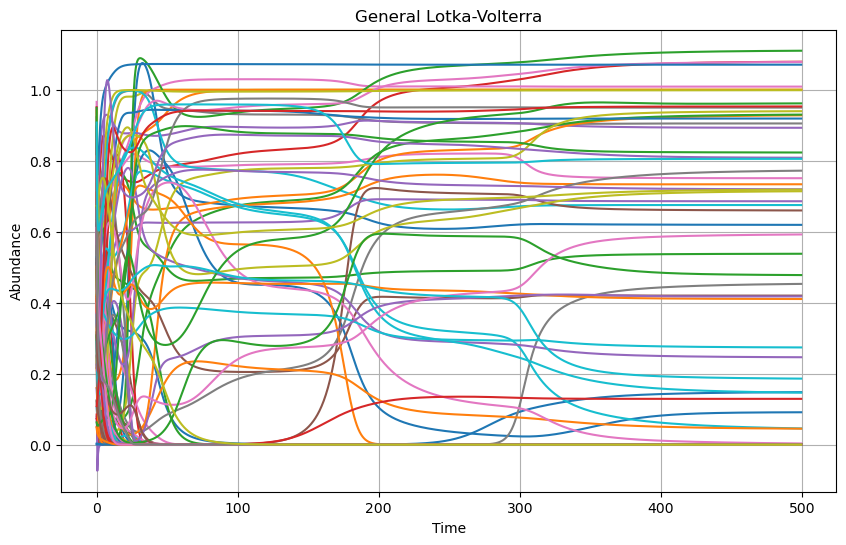

In [35]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

S = 100
mu = 4
sigma = 1
c = 10

def lotka_volterra(N, alpha):
    interaction_term = np.dot(alpha, N)  
    dNdt = N * (1 - N) - N * interaction_term
    return dNdt

def rk4_step(f, N, t, dt, h):
    k1 = f(N, h)
    k2 = f(N + 0.5 * dt * k1, h)
    k3 = f(N + 0.5 * dt * k2, h)
    k4 = f(N + dt * k3, h)
    return N + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)

def solve_lotka_volterra(alpha, N0, t_max, dt):
    t_values = np.arange(0, t_max, dt)
    N_values = np.zeros((len(t_values), len(N0)))
    N_values[0] = N0
    for i in range(1, len(t_values)):
        N_values[i] = rk4_step(lotka_volterra, N_values[i-1], t_values[i-1], dt, alpha)
    return t_values, N_values

def generate_random_undirected_graph():
    G = nx.erdos_renyi_graph(S, c/S)  
    return G

G = generate_random_undirected_graph()
adj_matrix = nx.to_numpy_array(G)
alpha = np.random.normal(mu/c , sigma/(np.sqrt(c)),size=(S,S))
interaction_matirx = adj_matrix * alpha
np.fill_diagonal(adj_matrix, 0)

N0 = np.random.uniform(0, 1, size=S)

t_max = 500
dt = 0.5

t_values, N_values = solve_lotka_volterra(interaction_matirx, N0, t_max, dt)

# Plotting results
plt.figure(figsize=(10, 6))
for i in range(S):
    plt.plot(t_values, N_values[:, i])
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.title('General Lotka-Volterra')
plt.grid(True)
plt.show()

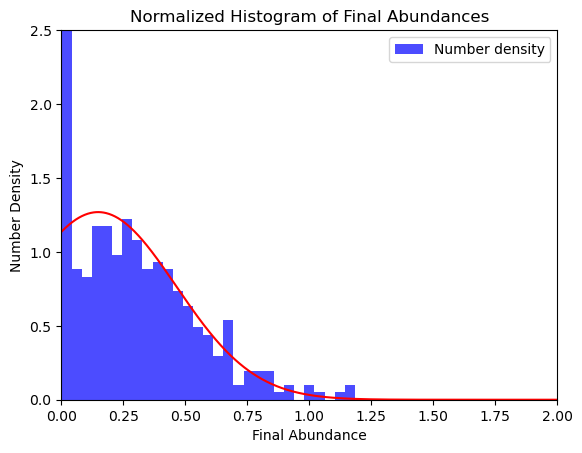

In [7]:
import numpy as np
from scipy.stats import norm
import scipy.optimize as opt


mean = 1 -(4*0.2130137731416583)
varience = (1**2)*0.09880843862243661
stabby = np.sqrt(varience)
x = np.linspace(0, 2, 1000)


final_abundances = N_values[-1] 
bin_edges = np.linspace(0, 2, 50)
hist, edges = np.histogram(final_abundances, bins=bin_edges) 
bin_width = edges[1] - edges[0]
number_density = hist / (len(final_abundances) * bin_width)
plt.bar(edges[:-1], number_density, width=bin_width, align='edge', alpha=0.7, color='blue', label='Number density')
plt.plot(x, norm.pdf(x, mean, stabby),color='r')
plt.ylim(0,2.5)
plt.xlim(0,2)
plt.xlabel("Final Abundance")
plt.ylabel("Number Density")
plt.title("Normalized Histogram of Final Abundances")
plt.legend()
plt.show()

Solved for sigma = 1.2


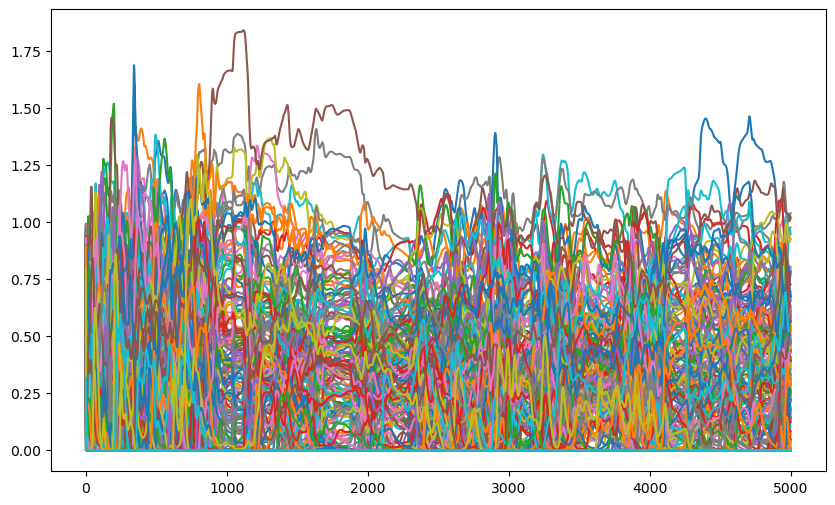

Solved for sigma = 1.2888888888888888


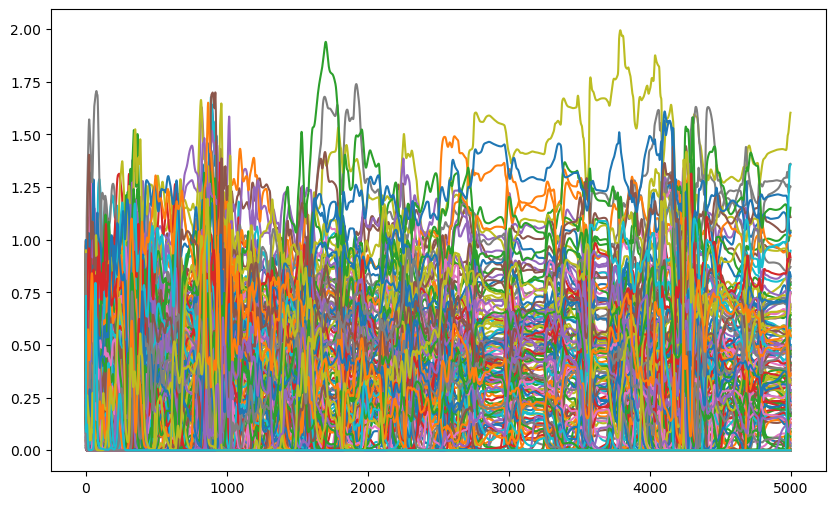

Solved for sigma = 1.3777777777777778


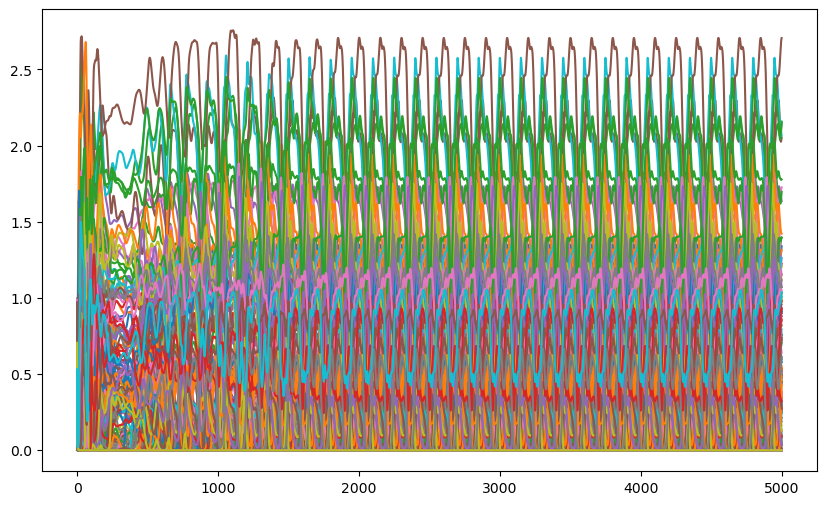

Solved for sigma = 1.4666666666666666


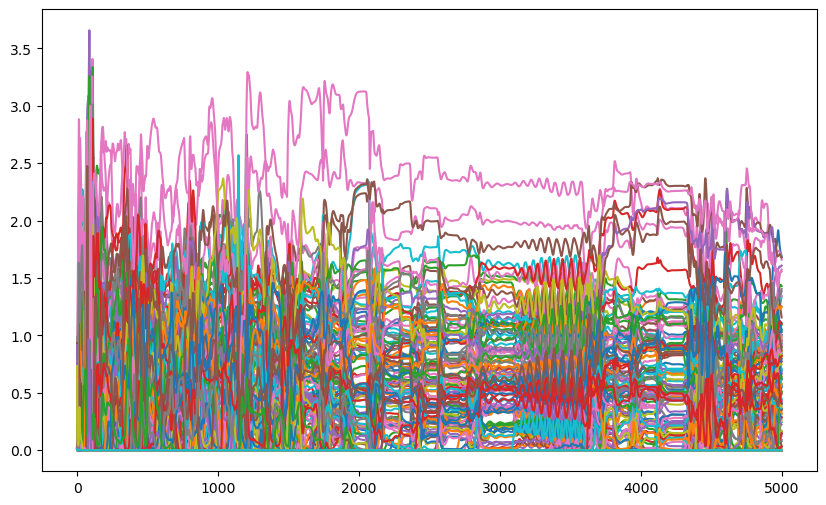

Solved for sigma = 1.5555555555555556


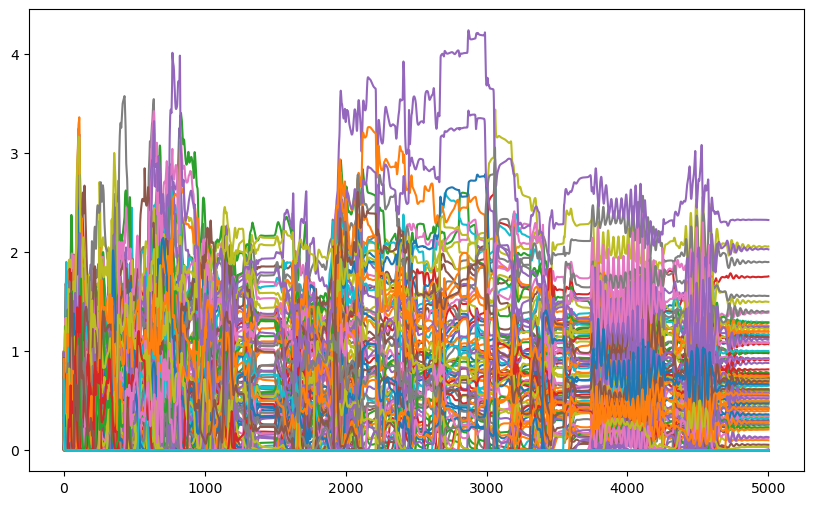

Solved for sigma = 1.6444444444444444


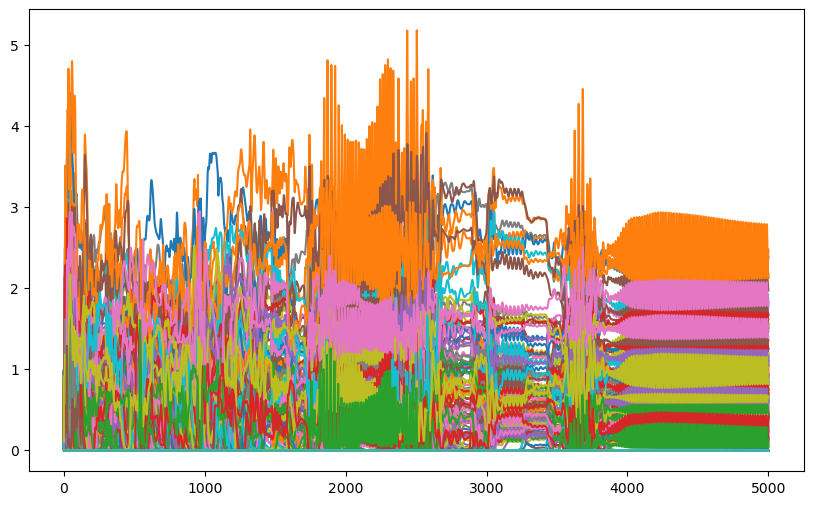

Solved for sigma = 1.7333333333333334


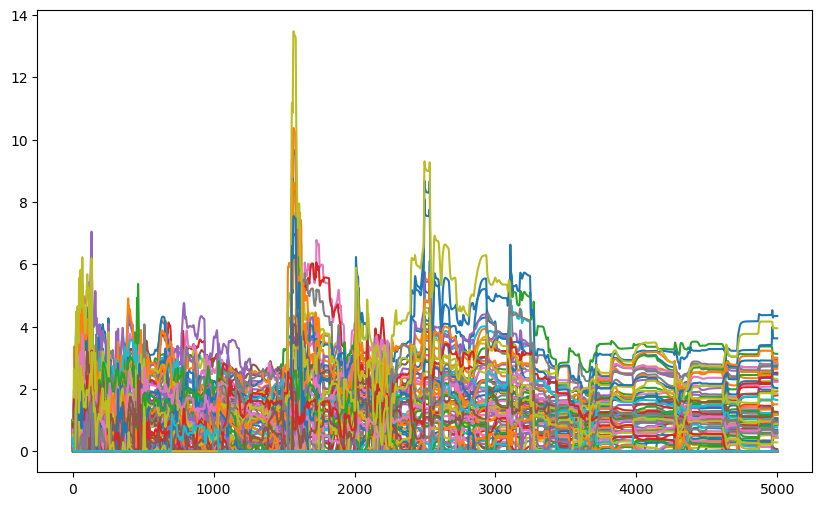

Solved for sigma = 1.8222222222222222


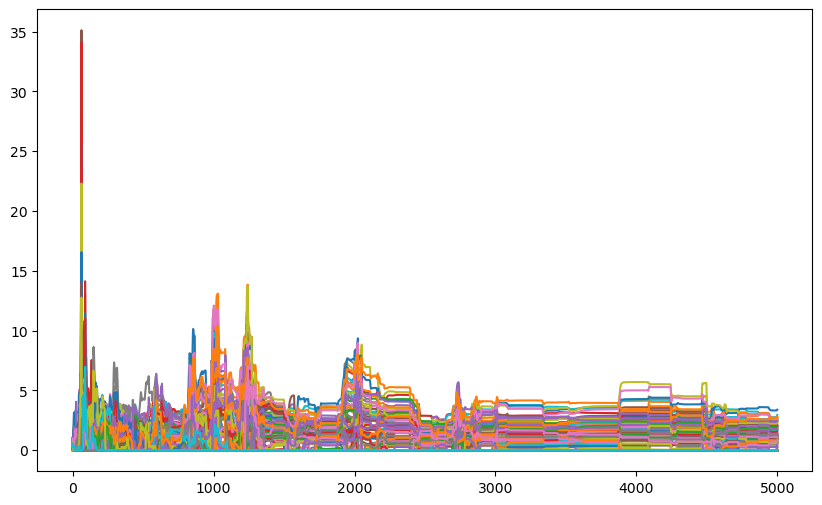

Solved for sigma = 1.911111111111111


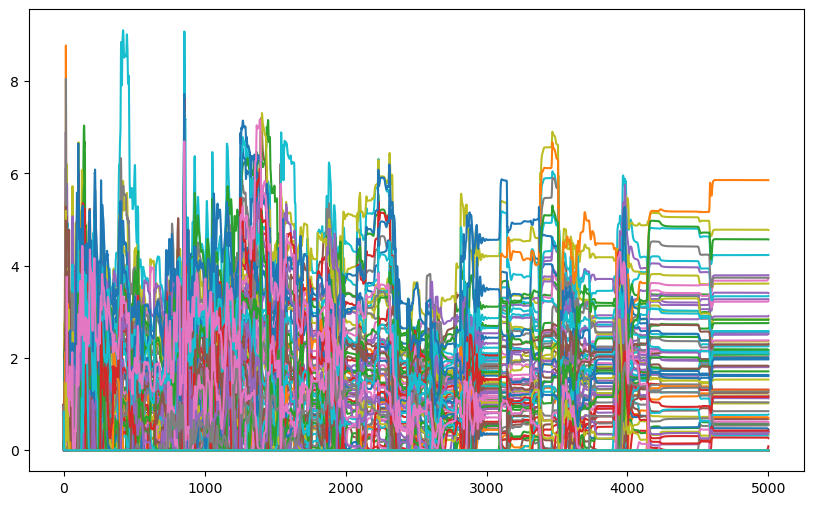

/var/folders/zm/5zxxsy2d75bdst_608fxx_hh0000gn/T/ipykernel_3739/481828943.py:13: RuntimeWarning: overflow encountered in multiply
  dNdt = N * (1 - N) - N * interaction_term
/var/folders/zm/5zxxsy2d75bdst_608fxx_hh0000gn/T/ipykernel_3739/481828943.py:13: RuntimeWarning: invalid value encountered in subtract
  dNdt = N * (1 - N) - N * interaction_term
/var/folders/zm/5zxxsy2d75bdst_608fxx_hh0000gn/T/ipykernel_3739/481828943.py:21: RuntimeWarning: overflow encountered in multiply
  return N + (dt / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)


Solved for sigma = 2.0


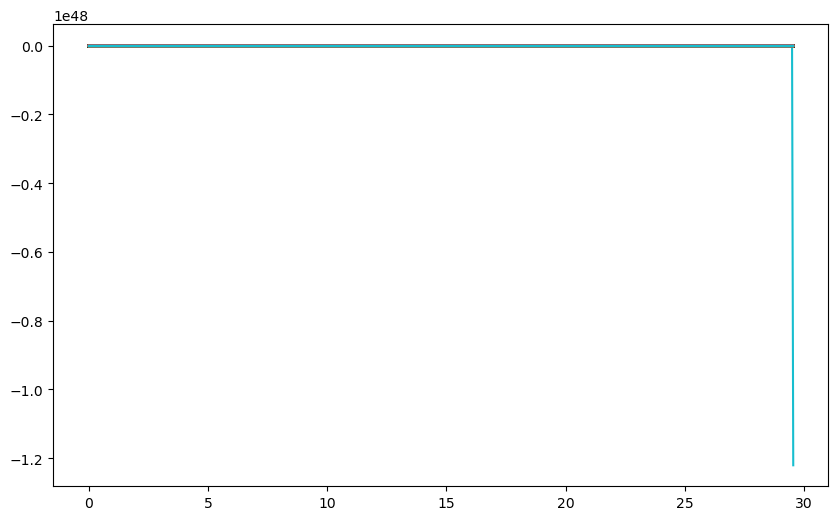

In [23]:
S1 = 500
c1 = 100
mu1 = 4
t_max1 = 5000
dt1 = 0.05

for i in np.linspace(1.2,2,10):
    G1 = generate_random_undirected_graph()
    adj_matrix1 = nx.to_numpy_array(G1)
    alpha1 = np.random.normal(mu1/c1 , i/(np.sqrt(c1)),size=(S1,S1))
    interaction_matirx1 = adj_matrix1 * alpha1
    np.fill_diagonal(adj_matrix1, 0)
    N01 = np.random.uniform(0, 1, size=S1)
    t_values1, N_values1 = solve_lotka_volterra(interaction_matirx1, N01, t_max1, dt1)
    print("Solved for sigma =", i)
    plt.figure(figsize=(10, 6))
    for i in range(S):
        plt.plot(t_values1, N_values1[:, i])
    plt.show()
    
    
    
    

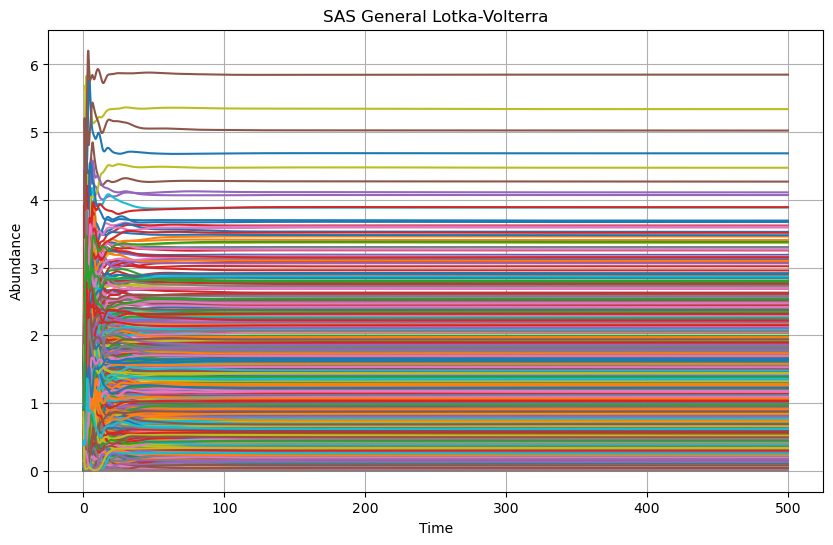

In [163]:
S2 = 1000
c2 = 999
sigma2 = 3
mu2 = 4


def generate_ER_antagonistic_matrix(S2):
    G2 = nx.erdos_renyi_graph(S2, c2/S2)
    adj_matrixG2 = nx.to_numpy_array(G2)
    weights = np.random.normal(mu2/c2 , sigma2/(np.sqrt(c2)),size=(S2,S2))
    np.fill_diagonal(weights, 0)
    Antagonistic_Matrix = adj_matrixG2*weights
    for i in range(S2):
        for j in range(i + 1, S2):  
            if Antagonistic_Matrix[i, j]*Antagonistic_Matrix[j, i] > 0:
                if np.random.rand() > 0.5:
                    Antagonistic_Matrix[i, j] = -Antagonistic_Matrix[i, j]
                else:
                    Antagonistic_Matrix[j, i] = -Antagonistic_Matrix[j, i]
    return Antagonistic_Matrix

A2 = generate_ER_antagonistic_matrix(S2)
N02 = np.random.uniform(0, 1, size=S2)


t_max2 = 500
dt2 = 0.05


t_values2, N_values2 = solve_lotka_volterra(A2, N02, t_max2, dt2)

plt.figure(figsize=(10, 6))
for i in range(S2):
    plt.plot(t_values2, N_values2[:, i])
plt.xlabel('Time')
plt.ylabel('Abundance')
plt.title('SAS General Lotka-Volterra')
plt.grid(True)
plt.show()


